In [1]:
%matplotlib notebook


# Rain simulation

Simulates rain drops on a surface by animating the scale and opacity
of 50 scatter points.

Author: Nicolas P. Rougier


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# # Fixing random state for reproducibility
# np.random.seed(19680801)


# # Create new Figure and an Axes which fills it.
# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_axes([0, 0, 1, 1], frameon=False)
# ax.set_xlim(0, 1), ax.set_xticks([])
# ax.set_ylim(0, 1), ax.set_yticks([])

# # Create rain data
# n_drops = 50
# rain_drops = np.zeros(n_drops, dtype=[('position', float, (2,)),
#                                       ('size',     float),
#                                       ('growth',   float),
#                                       ('color',    float, (4,))])

# # Initialize the raindrops in random positions and with
# # random growth rates.
# rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
# rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# # Construct the scatter which we will update during animation
# # as the raindrops develop.
# scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
#                   s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
#                   facecolors='none')


# def update(frame_number):
#     # Get an index which we can use to re-spawn the oldest raindrop.
#     current_index = frame_number % n_drops

#     # Make all colors more transparent as time progresses.
#     rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
#     rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

#     # Make all circles bigger.
#     rain_drops['size'] += rain_drops['growth']

#     # Pick a new position for oldest rain drop, resetting its size,
#     # color and growth factor.
#     rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
#     rain_drops['size'][current_index] = 5
#     rain_drops['color'][current_index] = (0, 0, 0, 1)
#     rain_drops['growth'][current_index] = np.random.uniform(50, 200)

#     # Update the scatter collection, with the new colors, sizes and positions.
#     scat.set_edgecolors(rain_drops['color'])
#     scat.set_sizes(rain_drops['size'])
#     scat.set_offsets(rain_drops['position'])


# # Construct the animation, using the update function as the animation director.
# animation = FuncAnimation(fig, update, interval=10)
# plt.show()

In [3]:
import kirchhoff.circuit_flow as kfc

K=kfc.initialize_flow_circuit_from_crystal('triagonal_planar',3)
K.set_source_landscape()
K.set_plexus_landscape()

Set source: default
set_source_landscape(): default is set and consistent :)
Set plexus: default
set_plexus_landscape(): default is set and consistent :)


In [4]:
import os.path as op
import iop
# import iop.pgf_figure as pf
import networkx as nx

def plot_line(x,y,G,e,ax):
    ax.plot(x, y, 
            linewidth=.5*(G.edges[e]['conductivity'])**0.25, 
            c='black', 
            alpha=0.5)

def network_plot_2D_periodic(K,path_out):

    G=K.G
    # Get node positions

#     fig,ax=pf.newfig(1.)
#     ax = fig.add_subplot(111)
    fig,ax = plt.subplots()

    im=draw_2D_periodic(ax,G,K)
#     cbar=plt.colorbar(im,ax=ax)
#     cbar.set_label(r'$\frac{c}{c_{max}}$')
    ax.set_axis_off()
#     pf.savefig(op.join(path_out,'network_plot'))

    return fig,ax

def draw_2D_periodic(ax,*args):

    G=args[0]
    K=args[1]
    pos = nx.get_node_attributes(G, 'pos')

#     cm = plt.cm.get_cmap('plasma')
#     max_c=np.amax(list(nx.get_node_attributes(G, 'concentrations').values()))

    # Loop on the pos dictionary to extract the x,y,z coordinates of each node
    X=[]
    Y=[]

#     CT=[]
    for key, value in pos.items():
        xi = value[0]
        yi = value[1]

        X.append(xi)
        Y.append(yi)
#         CT.append(G.nodes[key]['concentrations']/max_c)

    # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
    # Those two points are the extrema of the line to be plotted
    for i,e in enumerate(G.edges()):

        x = np.array((pos[e[0]][0], pos[e[1]][0]))
        y = np.array((pos[e[0]][1], pos[e[1]][1]))

        plot_line( x, y,G,e,ax)
      
    # Hide the axes
#     im=ax.scatter(X, Y, c= CT, vmin=0, vmax=1., cmap=cm, s=5)
    im=ax.scatter(X, Y, c='k', s=5)

    return im

# network_plot_2D_periodic(K,'../gallery')
# plt.show()

<IPython.core.display.Javascript object>


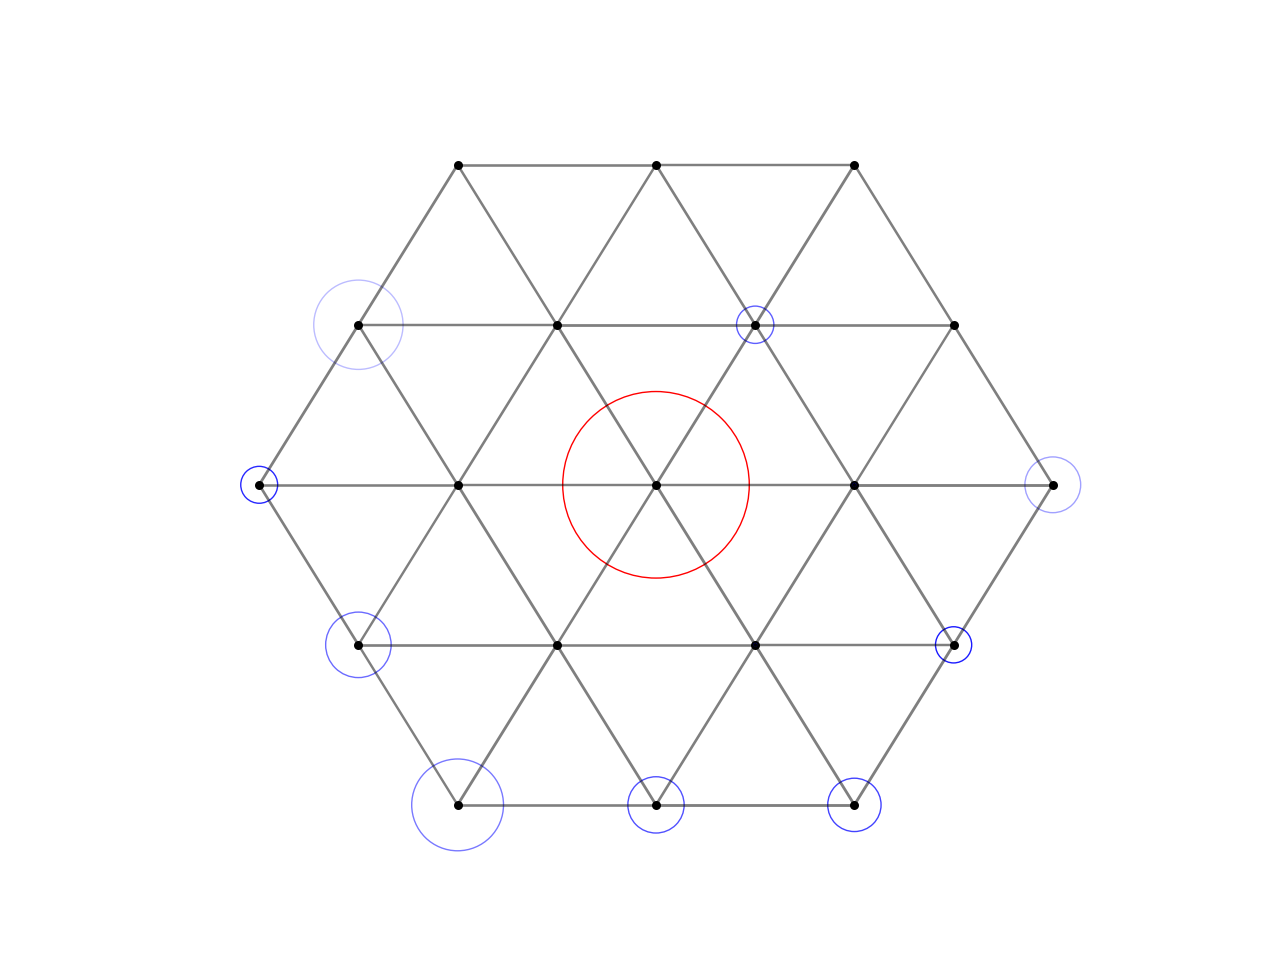

MovieWriter imagemagick unavailable; using Pillow instead.


In [12]:
# Fixing random state for reproducibility
np.random.seed(19680801)

import random
# Create new Figure and an Axes which fills it.
# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_axes([0, 0, 1, 1], frameon=False)

fig, ax =  network_plot_2D_periodic(K,'../gallery')
xs = 4.5
ys = 2
ax.set_xlim(-0.5, xs)
ax.set_ylim(-ys, ys)
# Create rain data
root = np.where(K.nodes['source'] > 0)[0]
sinks = np.where(K.nodes['source'] < 0)[0]
n_drops = len(K.G.nodes())
rain_drops = np.zeros(n_drops, dtype=[('position', float, (2,)),
                                      ('size',     float),
                                      ('growth',   float),
                                      ('color',    float, (4,))])

# Initialize the raindrops in random positions and with
# random growth rates.
pos = nx.get_node_attributes(K.G, 'pos')

rain_drops['position'] = np.array([value for key, value in pos.items()])
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
#     current_index = frame_number % n_drops
    current_index = random.sample(list(sinks), 1)
    current_sign = random.choices([1,0], k=n_drops)
#     new_size = np.random.uniform(0,1)

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += np.multiply(rain_drops['growth'], current_sign)

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
#     rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 1
    rain_drops['color'][current_index] = (0, 0, 1, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    
    rain_drops['size'][root[0]] = np.sum(rain_drops['size'][sinks])/5
    rain_drops['color'][root[0]] = (1, 0, 0, 1)
    
    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, update, interval=100)
# plt.show()
animation.save("../gallery/test.gif",writer="imagemagick")

In [ ]:
# current_sign = random.choices([-1,1,0], k=n_drops)
# current_sign

In [ ]:
root

In [ ]:
sinks

In [ ]:
random.sample(list(sinks),1)